# <font color='red'>Clustering Assignment</font>

**There will be some functions that start with the word "grader" ex: grader_actors(), grader_movies(), grader_cost1() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

**Please check [clustering assignment helper functions](https://drive.google.com/file/d/1V29KhKo3YnckMX32treEgdtH5r90DIjU/view?usp=sharing) notebook before attempting this assignment.**

*  Read graph from the given <font color='blue'>movie_actor_network.csv</font> (note that the graph is bipartite graph.)

*  Using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph. [Refer <font color='blue'>Clustering_Assignment_Reference.ipynb</font>]

* Split the dense representation into actor nodes, movies nodes.(Write you code in <font color='blue'>def data_split()</font>)


# <font color='red'>Task 1 : Apply clustering algorithm to group similar actors</font>

 1. For this task consider only the actor nodes 
 2. Apply any clustering algorithm of your choice <br>
    Refer : https://scikit-learn.org/stable/modules/clustering.html
 3. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
 4. Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters 
<br> (Write your code in <font color='blue'>def cost1()</font>)<br>
 5. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
 <br> (Write your code in <font color='blue'>def cost2()</font>)<br>
 6. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
 7. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
 8. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color

<img src='https://i.imgur.com/4SPYPFa.jpg'>

# <font color='red'>Task 2 : Apply clustering algorithm to group similar movies</font>


1. For this task consider only the movie nodes
2. Apply any clustering algorithm of your choice
3.Choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br>
(Write your code in <font color='blue'>def cost1()</font>)<br>
	
4. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ 
where N= number of clusters 
<br>(Write your code in <font color='blue'>def cost2()</font>)<br>


**Algorithm for actor nodes**

<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
        You can get the labels for corresponding actor nodes (algo.labels_)
        Create a graph for every cluster(ie., if n_clusters=3, create 3 graphs)
        (You can use ego_graph to create subgraph from the actual graph)
        compute cost1,cost2 
           (if n_cluster=3, cost1=cost1(graph1)+cost1(graph2)+cost1(graph3) # here we are doing summation
            cost2=cost2(graph1)+cost2(graph2)+cost2(graph3)
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

<br>

In [ ]:
#pip install networkx==2.3

In [1]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow 
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph


Bad key "text.kerning_factor" on line 4 in
C:\Users\sowjanya\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
data=pd.read_csv('movie_actor_network.csv', index_col=False, names=['movie','actor'])

In [3]:
data.head(20)

,movie,actor
0,m1,a1
1,m2,a1
2,m2,a2
3,m3,a1
4,m3,a3
5,m3,a4
6,m3,a5
7,m3,a6
8,m3,a7
9,m4,a1


In [4]:
edges = [tuple(x) for x in data.values.tolist()]

In [5]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

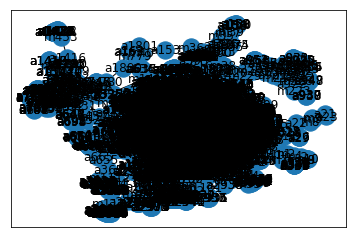

<Figure size 1000x1000 with 0 Axes>

In [6]:
nx.draw_networkx(B,with_labels=True)  
plt.figure(figsize=(10,10),dpi = 100)
plt.show()

In [7]:
A = list(nx.connected_component_subgraphs(B))[0]
print(len(A))


4703


In [8]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9650 entries, 0 to 9649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   movie   9650 non-null   object
 1   actor   9650 non-null   object
dtypes: object(2)
memory usage: 150.9+ KB


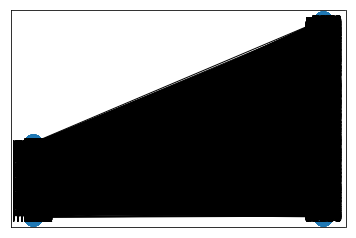

In [10]:
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
  
nx.draw_networkx(A,pos = pos,with_labels=True)  
plt.show()

#nx.draw_networkx(A,node_color='lightgreen')
#plt.show()

In [11]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [12]:
# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [13]:
from gensim.models import Word2Vec
model = Word2Vec(walks, vector_size=128, window=5)

In [14]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4703, 128)

In [15]:
print(model.wv.vectors[0:1]) #To see how first node has 128-dimensional vector

[[ 0.87773687 -0.94252014  0.6294301   0.24527064  0.56397164  0.12014235
   0.379621    2.1567645  -1.2389019   0.07995261 -0.5326117  -0.03445721
  -2.4400728   0.76923144 -0.86153543  0.8980444  -0.69549245 -0.36280233
  -0.81500214  1.7010667   0.5484406   0.47155827  1.1479573   2.2510452
  -0.902522   -0.4821208  -0.13111724 -2.057674   -2.0703497  -0.48042828
  -2.312977    0.27099293  0.86666566 -1.0117581   0.05609969 -1.3074433
   0.351692   -0.3010244   0.8056368  -1.4662758   1.7475983   0.40625188
  -1.4831656  -1.9783225   0.49277374  1.4985065  -0.16097802  1.58644
  -2.020486    0.68007284 -0.7543144   0.13763052  1.232943    1.0073866
  -0.1930097  -1.1986291   1.3187755   0.01503319  1.7096143   1.1987873
   0.6964406   0.6244505  -0.85294765  0.57510716 -0.98766536 -0.2729972
   0.08906098  2.8391528  -2.3341756  -0.830946   -1.8570594  -0.28008112
   1.5499595  -2.0453749  -1.0918639  -0.45575243  0.05013772  0.560262
  -1.3570899   0.96941525  1.7168306  -0.0758236

In [16]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index_to_key  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ A.node[node_id]['label'] for node_id in node_ids]

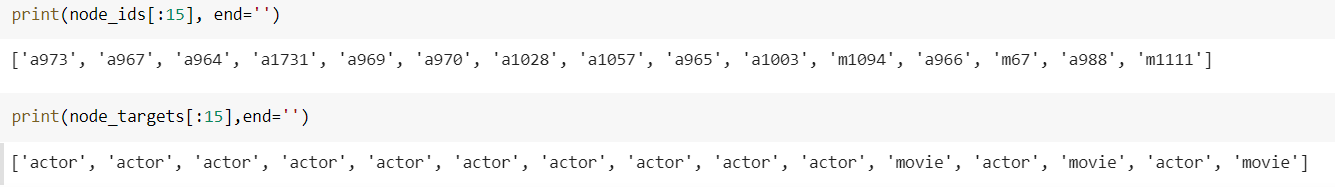

In [17]:
def data_split(node_ids,node_targets,node_embeddings):
    '''In this function, we will split the node embeddings into actor_embeddings , movie_embeddings '''
    actor_nodes=[act_ns for act_ns in node_ids if "a" in act_ns]
    movie_nodes=[mov_ns for mov_ns in node_ids if "m" in mov_ns]
    
    movie_indices=np.array([node_ids.index(mov_ind) for mov_ind in node_ids if "m" in mov_ind])
    actor_indices=np.array([node_ids.index(act_ind) for act_ind in node_ids if "a" in act_ind])
    
    actor_embeddings= node_embeddings[actor_indices,:]
    movie_embeddings= node_embeddings[movie_indices,:]
    

    # split the node_embeddings into actor_embeddings,movie_embeddings based on node_ids
    # By using node_embedding and node_targets, we can extract actor_embedding and movie embedding
    # By using node_ids and node_targets, we can extract actor_nodes and movie nodes

    return actor_nodes,movie_nodes,actor_embeddings,movie_embeddings


In [18]:
actor_nodes,movie_nodes,actor_embeddings,movie_embeddings=data_split(node_ids,node_targets,node_embeddings)

In [19]:
print(movie_embeddings)

[[-2.699026    0.6264352   1.0512346  ... -1.7237298   0.01759081
   1.0792474 ]
 [ 0.8675493  -3.1380904   2.8684876  ...  0.90618306 -0.82658875
   0.02611233]
 [-1.5421274  -0.56689113 -0.25942662 ... -2.6206253   2.3347864
   1.8665202 ]
 ...
 [-0.01245301 -0.0041084   0.13862358 ... -0.07014571 -0.05274328
  -0.03352639]
 [ 0.04278712  0.019712    0.04983752 ... -0.05570415  0.01508289
  -0.01769079]
 [ 0.09157173  0.00893673  0.04744078 ... -0.0923807  -0.02381661
  -0.03800866]]


<font color='cyan'>Grader function - 1</font>

In [20]:
def grader_actors(data):
    assert(len(data)==3411)
    return True
grader_actors(actor_nodes)

True

<font color='cyan'>Grader function - 2</font>

In [21]:
def grader_movies(data):
    assert(len(data)==1292)
    return True
grader_movies(movie_nodes)

True

<font color='blue'>Calculating cost1</font>

Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>

In [22]:
def cost1(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    max_nodes,total_nodes=len(max(nx.connected_components(graph),key=len)),graph.number_of_nodes()
    cost1= max_nodes/(total_nodes*number_of_clusters) 
    
    return cost1

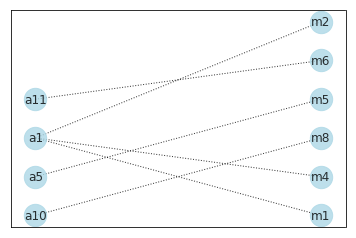

In [23]:
import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(['a1','a5','a10','a11'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(['m1','m2','m4','m6','m5','m8'], bipartite=1)
graded_graph.add_edges_from([('a1','m1'),('a1','m2'),('a1','m4'),('a11','m6'),('a5','m5'),('a10','m8')])
l={'a1','a5','a10','a11'};r={'m1','m2','m4','m6','m5','m8'}
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw_networkx(graded_graph, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)

<font color='cyan'>Grader function - 3</font>

In [24]:
graded_cost1=cost1(graded_graph,3)
def grader_cost1(data):
    assert(data==((1/3)*(4/10))) # 1/3 is number of clusters
    return True
grader_cost1(graded_cost1)

True

<font color='blue'>Calculating cost2</font>

Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 

In [27]:
def cost2_task1(graph,number_of_clusters):
    sum_of_degree=sum([graph.degree(i) for i in graph.nodes if "a" in i ])
    num_of_nodes=len([j for j in graph.nodes if "m" in j])
    cost2= (sum_of_degree/num_of_nodes)/(number_of_clusters)
    return cost2

<font color='cyan'>Grader function - 4</font>

In [28]:
graded_cost2=cost2_task1(graded_graph,3)
def grader_cost2(data):
    assert(data==((1/3)*(6/6))) # 1/3 is number of clusters
    return True
grader_cost2(graded_cost2)

True

# Task-1

In [29]:
actor_nodes,movie_nodes,actor_embeddings,movie_embeddings=data_split(node_ids,node_targets,node_embeddings)
num_clusters=[3, 5, 10, 30, 50, 100, 200, 500]
list_cost1_mul_cost2 = []
for each_cluster in num_clusters:
    kmeans = KMeans(n_clusters=each_cluster, random_state=0).fit(actor_embeddings)
    cost1_sum = 0
    cost2_sum = 0
    for i in range(0,each_cluster):
        test_nodes=np.array(actor_nodes).reshape(len(actor_nodes),)[kmeans.labels_==i].tolist()
        testgraph=nx.Graph()
        for j in test_nodes:
            testgraph.add_nodes_from(nx.ego_graph(B,j).nodes)
            testgraph.add_edges_from(nx.ego_graph(B,j).edges())
        cost1_sum=cost1_sum + cost1(testgraph,each_cluster)
        cost2_sum=cost2_sum + cost2_task1(testgraph,each_cluster)
    print("cost1*cost2 value for cluster number "+str(each_cluster)+" : "+str(cost1_sum*cost2_sum))
    list_cost1_mul_cost2.append(cost1_sum*cost2_sum)
kmax_actor=num_clusters[list_cost1_mul_cost2.index(max(list_cost1_mul_cost2))]
print("maximum product of costs = "+str(max(list_cost1_mul_cost2)))
print("maximum value of cost for actors is obtained at:"+str(kmax_actor))
    

cost1*cost2 value for cluster number 3 : 3.8119623370008444
cost1*cost2 value for cluster number 5 : 2.870543050377122
cost1*cost2 value for cluster number 10 : 2.2559158133280257
cost1*cost2 value for cluster number 30 : 1.739237852503193
cost1*cost2 value for cluster number 50 : 1.5990745977144905
cost1*cost2 value for cluster number 100 : 1.4901063116073494
cost1*cost2 value for cluster number 200 : 1.579708403468036
cost1*cost2 value for cluster number 500 : 1.8307591061022042
maximum product of costs = 3.8119623370008444
maximum value of cost for actors is obtained at:3


# Task-2

In [33]:
def cost2_task2(graph,number_of_clusters):
    sum_of_degree=sum([graph.degree(i) for i in graph.nodes if "m" in i ])
    num_of_nodes=len([j for j in graph.nodes if "a" in j])
    cost2= (sum_of_degree/num_of_nodes)/(number_of_clusters)
    return cost2

In [34]:
actor_nodes,movie_nodes,actor_embeddings,movie_embeddings=data_split(node_ids,node_targets,node_embeddings)
num_clusters=[3, 5, 10, 30, 50, 100, 200, 500]
list_cost1_mul_cost2 = []
for each_cluster in num_clusters:
    kmeans = KMeans(n_clusters=each_cluster, random_state=0).fit(movie_embeddings)
    cost1_sum = 0
    cost2_sum = 0
    for i in range(0,each_cluster):
        test_nodes=np.array(movie_nodes).reshape(len(movie_nodes),)[kmeans.labels_==i].tolist()
        testgraph=nx.Graph()
        for j in test_nodes:
            testgraph.add_nodes_from(nx.ego_graph(B,j).nodes)
            testgraph.add_edges_from(nx.ego_graph(B,j).edges())
        cost1_sum=cost1_sum + cost1(testgraph,each_cluster)
        cost2_sum=cost2_sum + cost2_task2(testgraph,each_cluster)
    print("cost1*cost2 value for cluster number "+str(each_cluster)+" : "+str(cost1_sum*cost2_sum))
    list_cost1_mul_cost2.append(cost1_sum*cost2_sum)
kmax_movie=num_clusters[list_cost1_mul_cost2.index(max(list_cost1_mul_cost2))]
print("maximum product of costs = "+str(max(list_cost1_mul_cost2)))
print("maximum value of cost for movies is obtained at:"+str(kmax_movie))

cost1*cost2 value for cluster number 3 : 2.7735158183645
cost1*cost2 value for cluster number 5 : 2.4996587903083825
cost1*cost2 value for cluster number 10 : 2.472907458898848
cost1*cost2 value for cluster number 30 : 2.1226011541257805
cost1*cost2 value for cluster number 50 : 1.8079347715700187
cost1*cost2 value for cluster number 100 : 1.5619245588719115
cost1*cost2 value for cluster number 200 : 1.3830017455276746
cost1*cost2 value for cluster number 500 : 1.206395285093442
maximum product of costs = 2.7735158183645
maximum value of cost for movies is obtained at:3


<font color='blue'>Grouping similar actors</font>

In [35]:
kmeans = KMeans(n_clusters=kmax_actor, random_state=0).fit(actor_embeddings)
actor_nodes=np.array(actor_nodes)

In [36]:
actor_data=np.vstack((actor_nodes,kmeans.labels_))
actorss=pd.DataFrame(actor_data.T,columns=["actor_node","group"])
actorss.head()

,actor_node,group
0,a973,1
1,a967,1
2,a964,1
3,a1731,2
4,a970,1


<font color='blue'>Displaying similar actor clusters</font>

In [37]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1,learning_rate = 400,random_state = 100)
tsne_actor = tsne.fit_transform(actor_embeddings) 

label_map = { l: i for i, l in enumerate(np.unique(list(kmeans.labels_)))}
node_colours = [ label_map[target] for target in list(kmeans.labels_)]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3411 samples in 0.001s...
[t-SNE] Computed neighbors for 3411 samples in 0.253s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3411
[t-SNE] Computed conditional probabilities for sample 2000 / 3411
[t-SNE] Computed conditional probabilities for sample 3000 / 3411
[t-SNE] Computed conditional probabilities for sample 3411 / 3411
[t-SNE] Mean sigma: 0.588109
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.697571
[t-SNE] KL divergence after 1000 iterations: 1.111557


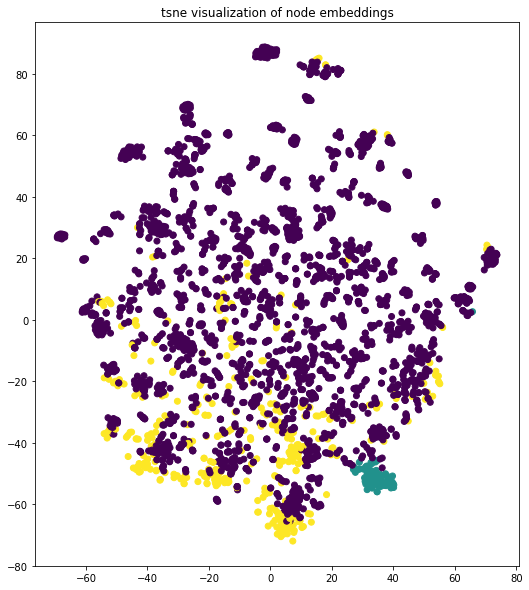

In [38]:
plt.figure(figsize=(10,10))
plt.axes().set(aspect="equal")
plt.scatter(tsne_actor[:,0], 
            tsne_actor[:,1], 
            c=node_colours, alpha=1)
plt.title('tsne visualization of node embeddings')

plt.show()

<font color='blue'>Grouping similar movies</font>

In [39]:
kmeans_movies = KMeans(n_clusters=kmax_movie, random_state=0).fit(movie_embeddings)
movie_nodes=np.array(movie_nodes)

In [40]:
movie_data=np.vstack((movie_nodes,kmeans_movies.labels_))
moviess=pd.DataFrame(movie_data.T,columns=["movie_node","group"])
moviess.head()

,movie_node,group
0,m1094,1
1,m1111,1
2,m1100,1
3,m67,1
4,m1095,1


<font color='blue'>Displaying similar movie clusters</font>

In [41]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1,learning_rate = 400,random_state = 100)
tsne_movie = tsne.fit_transform(movie_embeddings) 

label_map = { l: i for i, l in enumerate(np.unique(list(kmeans_movies.labels_)))}
node_colours = [ label_map[target] for target in list(kmeans_movies.labels_)]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1292 samples in 0.001s...
[t-SNE] Computed neighbors for 1292 samples in 0.031s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1292
[t-SNE] Computed conditional probabilities for sample 1292 / 1292
[t-SNE] Mean sigma: 1.312740
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.753510
[t-SNE] KL divergence after 1000 iterations: 1.215195


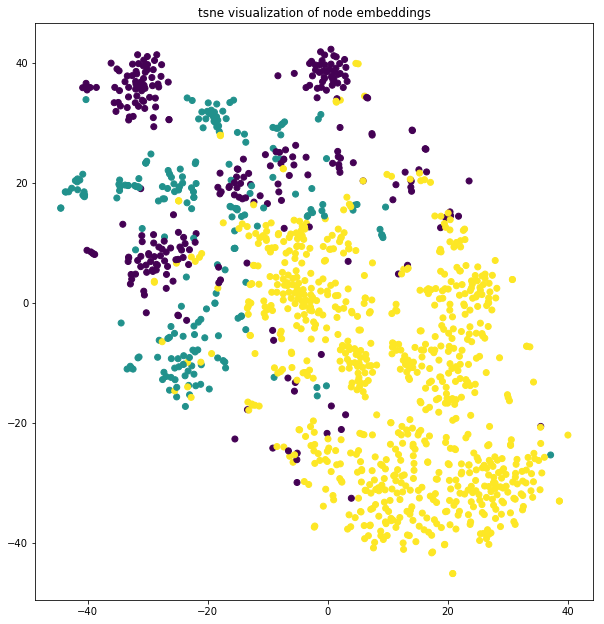

In [42]:
plt.figure(figsize=(10,15))
plt.axes().set(aspect="equal")
plt.scatter(tsne_movie[:,0], 
            tsne_movie[:,1], 
            c=node_colours, alpha=1)
plt.title('tsne visualization of node embeddings')

plt.show()